# Description

This notebook illustrates the effect of changing the weight assigned to the "Noise" class in a binary classification "FR" versus "Noise" by a convolutional neural network.

Example: 
```
class_weight = {0:1.0, 1:5.0}

history = model.fit(
    data.x_train, data.y_train, 
    epochs=epochs,
    class_weight=class_weight#callbacks
)
```

In this case, every instance of **class 1 (Noise)** will be treated as 5 instances of **class 0 (FR)**.

# Imports

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import os

# 1. Effects of CNN weights on Fast Ripples

In [1]:
path_root = "markers_FR"
path_list = os.listdir(path_root)
     
step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for filename in path_list:      
    
    path = os.path.join(path_root, filename)
 
    print("")
    print(path)
    df = pd.read_csv(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-10_detection_summary_20022023_11-45-32.xlsx
Index(['Unnamed: 0', 'JSON-index', 'JSON-ID', 'chan_name', 'event_time',
       'pass_step1', 'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 59
Pass step 2: 123

5dB
------
Pass step 1: 978
Pass step 2: 1031

10dB
------
Pass step 1: 1436
Pass step 2: 1436

15dB
------
Pass step 1: 1439
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-5_detection_summary_20022023_11-28-06.xlsx
Index(['Unnamed: 0', 'JSON-index', 'JSON-ID', 'chan_name', 'event_time',
       'pass_step1', 'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 124
Pass step 2: 123

5dB
------
Pass step 1: 1117
Pass step 2: 1031

10dB
------
Pass step 1: 1413
Pass step 2: 1436

15dB
------
Pass step 1: 1437
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1_detection_summary_20022023_15-25-

## 1.1. Sort by w (non-FR weight in the model)

In [2]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

## 1.2. Plot results

                Weight 1 base  Weight 1 new  Weight 2 new  Weight 5 new  \
0 dB (n=1440)        4.097222      8.611111     12.430556     12.569444   
5 dB (n=1440)       67.916667     77.569444     84.652778     87.222222   
10 dB (n=1440)      99.722222     98.125000    100.000000    100.000000   
15 dB (n=1440)      99.930556     99.791667     99.930556     99.930556   

                Weight 10 new  
0 dB (n=1440)        9.236111  
5 dB (n=1440)       80.972222  
10 dB (n=1440)      97.361111  
15 dB (n=1440)      97.916667  


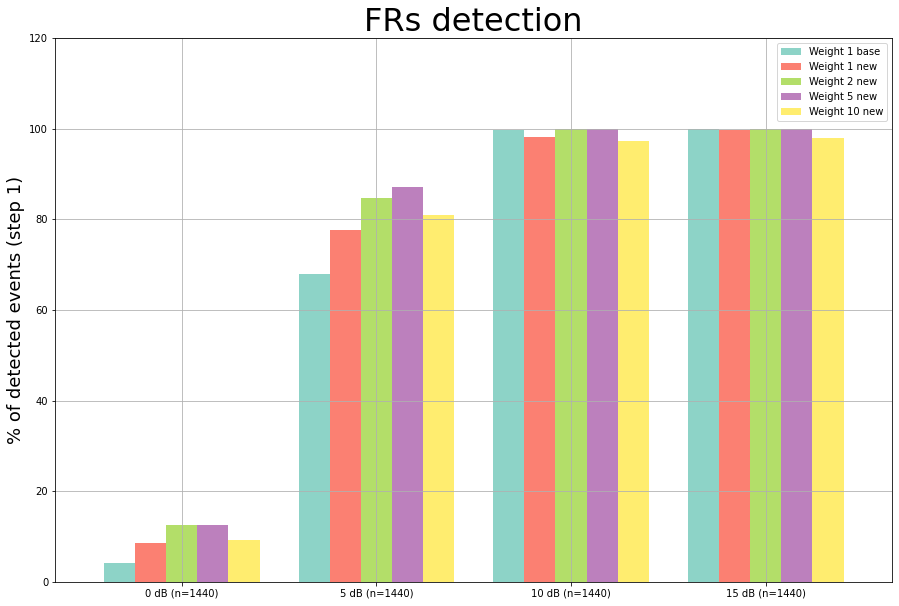

In [3]:
res_dict = {"Weight 1 base": np.array(w_1_1)/14.40,
           "Weight 1 new" : np.array(w_1_2)/14.40,
           "Weight 2 new" : np.array(w_2)/14.40,
           "Weight 5 new" : np.array(w_5)/14.40,
           "Weight 10 new" : np.array(w_10)/14.40,
          }

res_df = pd.DataFrame(res_dict, index = ["0 dB (n=1440)", "5 dB (n=1440)", "10 dB (n=1440)", "15 dB (n=1440)"])
print(res_df)


res_df.plot(kind='bar', figsize=(15,10), colormap='Set3', width=.8)
plt.title("FRs detection", fontsize = 32)
plt.ylabel("% of detected events (step 1)", fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.ylim(0,120)
plt.grid()


# 2. Effects of CNN weights on non-FRs (spikes)

In [4]:
path_root = "markers_spike"
path_list = os.listdir(path_root)

step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for filename in path_list:    
    
    path = os.path.join(path_root, filename)
 
    print("")
    print(path)
    df = pd.read_csv(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1base_detection_summary_16032023_10-47-27.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2', 'pass_step3_NN', 'pass_step3_sig'],
      dtype='object')

0dB
------
Pass step 1: 63
Pass step 2: 70

5dB
------
Pass step 1: 77
Pass step 2: 76

10dB
------
Pass step 1: 72
Pass step 2: 77

15dB
------
Pass step 1: 74
Pass step 2: 77

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-5_detection_summary_16032023_12-26-33.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2', 'pass_step3_NN', 'pass_step3_sig'],
      dtype='object')

0dB
------
Pass step 1: 56
Pass step 2: 70

5dB
------
Pass step 1: 69
Pass step 2: 76

10dB
------
Pass step 1: 65
Pass step 2: 77

15dB
------
Pass step 1: 66
Pass step 2: 77

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-10_dete

## 2.1. Sort by w (non-FR weight in the model)

In [5]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

                Weight 1 base  Weight 1 new  Weight 2 new  Weight 5 new  \
0 dB (n=1440)        4.375000      3.888889      3.472222      3.680556   
5 dB (n=1440)        5.347222      4.791667      4.583333      5.277778   
10 dB (n=1440)       5.000000      4.513889      4.305556      4.791667   
15 dB (n=1440)       5.138889      4.583333      4.375000      4.722222   

                Weight 10 new  
0 dB (n=1440)        3.819444  
5 dB (n=1440)        4.791667  
10 dB (n=1440)       4.375000  
15 dB (n=1440)       4.583333  


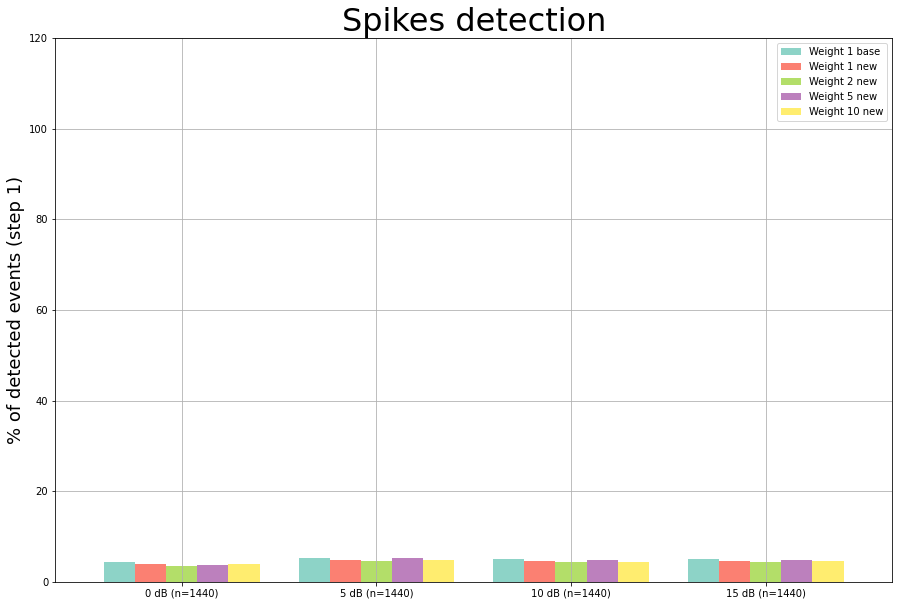

In [6]:
res_dict = {"Weight 1 base": np.array(w_1_1)/14.40,
           "Weight 1 new" : np.array(w_1_2)/14.40,
           "Weight 2 new" : np.array(w_2)/14.40,
           "Weight 5 new" : np.array(w_5)/14.40,
           "Weight 10 new" : np.array(w_10)/14.40,
          }

res_df = pd.DataFrame(res_dict, index = ["0 dB (n=1440)", "5 dB (n=1440)", "10 dB (n=1440)", "15 dB (n=1440)"])
print(res_df)

res_df.plot(kind='bar', figsize=(15,10), colormap='Set3', width=.8)
plt.title("Spikes detection", fontsize = 32)
plt.ylabel("% of detected events (step 1)", fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.ylim(0,120)
plt.grid()